<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :** As per the given dataset we are supposed to find the best ad or such a ad which is having maximum naumber of clicks in given span so that we can rather use that one ad itself in order to maximise the
 profit that we get from the website. Each ad has a fixed conversion rate.

# Importing libraries and dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataSet = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
dataSet

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# Implementing Thompson Sampling

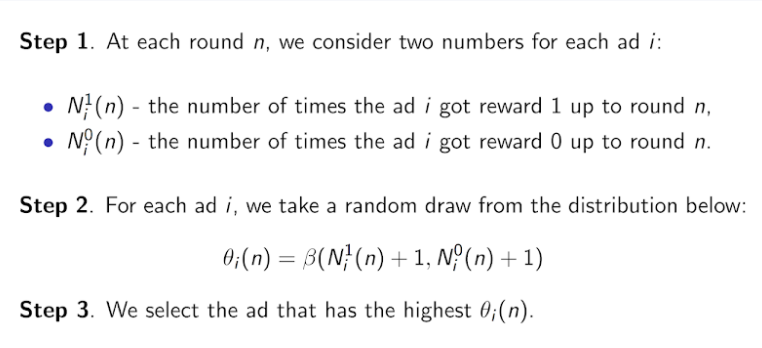

In [24]:
import random

# number of users
N  = 10000
# number of ads
d = 10
# number of times ad i got reward 1 upto round n
numbers_of_rewards_1 = [0]*d
# number of times ad i got reward 0 upto round n
numbers_of_rewards_0 = [0]*d
# ads selected
ads_selected = []
# total number of rewards
total_rewards = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    # here we are supposed to get a random value as mentioned in above algorithm using beta variate whixh is beta distribution
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
    if(max_random < random_beta):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataSet.values[n ,ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_rewards += reward
  

# Visualising Results

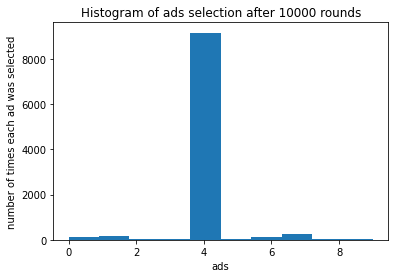

In [14]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 10000 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

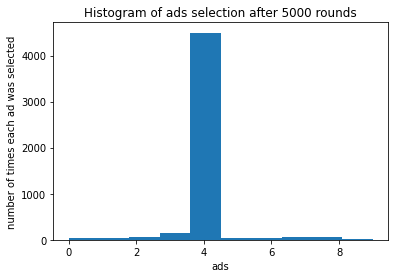

In [19]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 5000 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

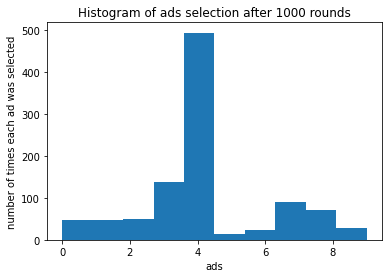

In [21]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 1000 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

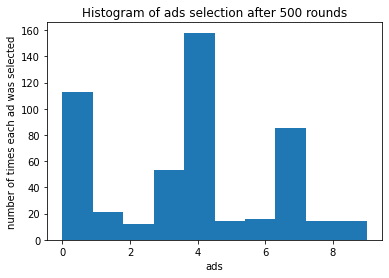

In [23]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection after 500 rounds")
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()

**CONCLUSION :** As per above results we can conclude that when we work with thompson sampling we are getting better outputs as compared to UCB algorithm.
Main conclusion here is that we are able to state which ad is superior even after only 500 rounds where as in UCB after 500 rounds we saw that ad 8 was dominating but here the scenario is quite different as we are able to see that ad is dominating right from start.
So finally we can conclude that thompson sampling is superior to UCB and we should try to use Thompson sampling for reinforcement learning.

In [ ]:
ads_selected # 10000 rounds

In [29]:
numbers_of_rewards_0

[110, 113, 23, 24, 6763, 26, 68, 169, 54, 26]

In [30]:
numbers_of_rewards_1

[23, 25, 0, 0, 2519, 0, 9, 42, 6, 0]

In [31]:
total_rewards

2624